# Validation charts and statistics

Generates charts and statistics to validate the data in the country comparison dataset.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
all_stats = pd.read_csv("../data/processed/all_country_stats.csv")
all_stats.head()

,ADM0_CODE,system:index,ADM0_NAME,DISP_AREA,EXP0_YEAR,STATUS,STR0_YEAR,Shape_Area,Shape_Leng,const,...,sluc_deforest_cropland,sluc_deforest_carbon_nonnat_ha,sluc_deforest_carbon_cropland_ha,sluc_deforest_carbon_cropland,sluc_fao_agland_ha,sluc_fao_cropland_ha,sluc_fao_cropland,sluc_emissions_fao_agland_ha,sluc_emissions_fao_cropland_ha,sluc_emissions_fao_cropland
0,1.0,00000000000000000029,Afghanistan,NO,3000,Member State,1000,62.554886,58.988002,6.418374e+05,...,0.073256,0.015173,0.046839,426.405461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.0,00000000000000000012,Aksai Chin,YES,3000,Sovereignty unsettled,1000,3.028950,10.774006,3.066542e+04,...,0.000000,0.205093,inf,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,00000000000000000067,Albania,NO,3000,Member State,1000,3.076365,13.494287,2.868165e+04,...,1.740409,17.039273,55.946439,34104.748068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4.0,000000000000000000a5,Algeria,NO,3000,Member State,1000,212.693097,81.248391,2.308743e+06,...,12.861472,3.555319,6.578726,186951.845670,0.000178,0.001737,3.751314,1.230603,12.028345,25981.181100
4,5.0,00010000000000000018,American Samoa,NO,3000,US Non-Self-Governing Territory,1000,0.016747,2.011719,1.999620e+02,...,0.000000,0.000000,NaN,0.000000,0.003802,0.001036,1.101049,108.777003,29.638200,31499.188021


/Users/fgassert/Documents/git/lg_landscape_indicators/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/fgassert/Documents/git/lg_landscape_indicators/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: title={'center': 'Forest loss area (km2) / yr'}, xlabel='Country'>

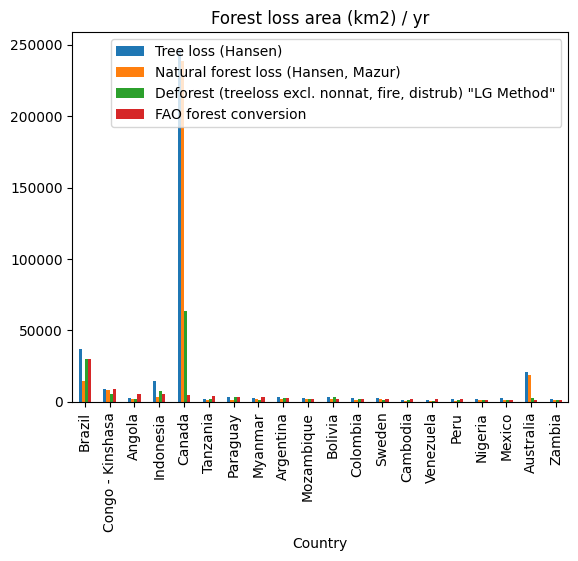

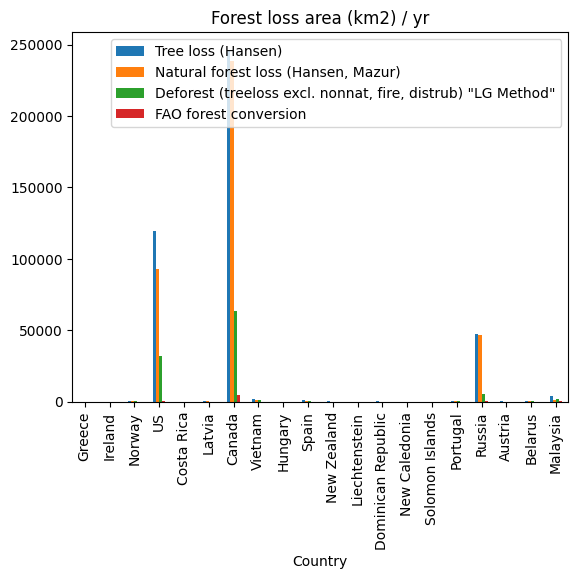

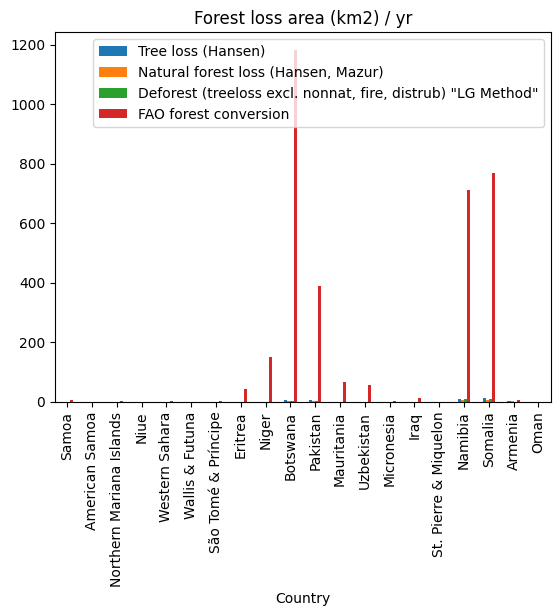

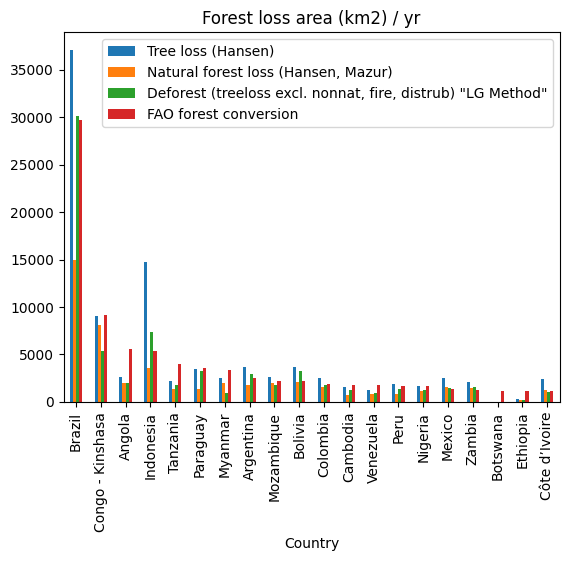

In [18]:
# Comparison of deforestation definitions
N = 20
SORT_COL = "fao_forestloss"
title = "Forest loss area (km2) / yr"
cols = {
    "country_name": "Country",
    "treeloss": "Tree loss (Hansen)",
    "nat_treeloss": "Natural forest loss (Hansen, Mazur)",
    "deforest": 'Deforest (treeloss excl. nonnat, fire, distrub) "LG Method"',
    "fao_forestloss": "FAO forest conversion",
}
all_stats.sort_values(SORT_COL, ascending=False).head(N).filter(cols.keys()).rename(
    columns=cols
).plot.bar(x="Country", title=title)

all_stats["fao_ratio"] = np.log(all_stats["deforest"] / all_stats["fao_forestloss"])
all_stats[all_stats["fao_forestloss"] > 0].sort_values("fao_ratio", ascending=False).head(N).filter(
    cols.keys()
).rename(columns=cols).plot.bar(x="Country", title=title)
all_stats["fao_ratio"] = np.log(all_stats["deforest"] / all_stats["fao_forestloss"])
all_stats[all_stats["fao_forestloss"] > 0].sort_values("fao_ratio").head(N).filter(
    cols.keys()
).rename(columns=cols).plot.bar(x="Country", title=title)


REGION_LIST = [
    "Southern Asia",  #'Southern Europe', 'Northern Africa',
    "Polynesia",
    "Sub-Saharan Africa",
    "Latin America and the Caribbean",  #'Western Asia',
    #'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
    #'Northern America',
    "South-eastern Asia",
    "Eastern Asia",
    #'Northern Europe',
    "Melanesia",
    "Micronesia",  #'Central Asia'
]
all_stats["tropical"] = all_stats.region.isin(REGION_LIST)
all_stats_trop = all_stats[all_stats["tropical"]]
all_stats_trop.sort_values(SORT_COL, ascending=False).head(N).filter(cols.keys()).rename(
    columns=cols
).plot.bar(x="Country", title=title)

/var/folders/dy/fpsjfhd97fbfjcd25y_m3_8m0000gn/T/ipykernel_91138/1630371954.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


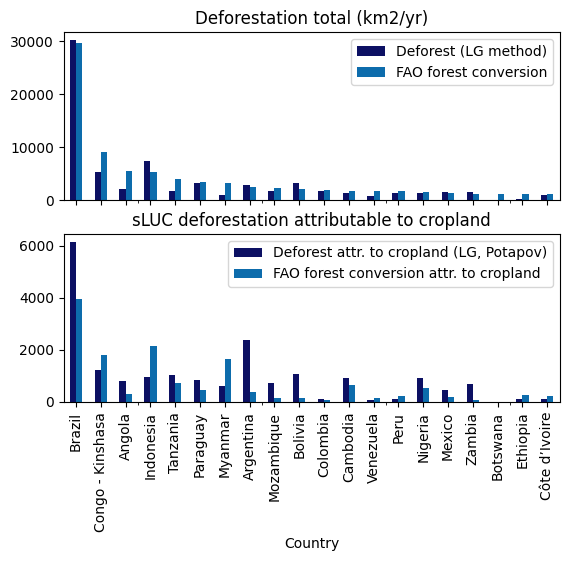

In [19]:
# Comparison of sLUC
c = ["#0c1063", "#0d6cac"]

fig, axs = plt.subplots(2, 1, sharex=True)
title = "Deforestation total (km2/yr)"
cols = {
    "country_name": "Country",
    "deforest": "Deforest (LG method)",
    "fao_forestloss": "FAO forest conversion",
}
all_stats_trop.sort_values(SORT_COL, ascending=False).head(N).filter(cols.keys()).rename(
    columns=cols
).plot.bar(x="Country", title=title, color=c, ax=axs[0])

title = "sLUC deforestation attributable to cropland"
cols = {
    "country_name": "Country",
    "sluc_deforest_cropland": "Deforest attr. to cropland (LG, Potapov)",
    "sluc_fao_cropland": "FAO forest conversion attr. to cropland",
}
all_stats_trop.sort_values(SORT_COL, ascending=False).head(N).filter(cols.keys()).rename(
    columns=cols
).plot.bar(x="Country", title=title, color=c, ax=axs[1])
fig.show()

/var/folders/dy/fpsjfhd97fbfjcd25y_m3_8m0000gn/T/ipykernel_91138/2350094979.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


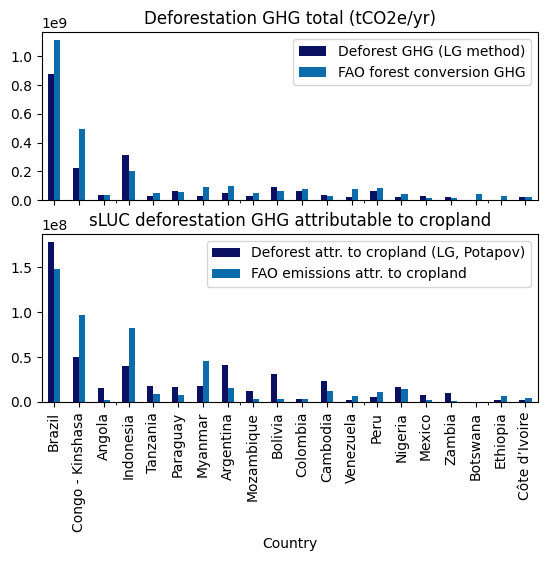

In [20]:
# Comparison of sLUC
c = ["#0c1063", "#0d6cac"]

fig, axs = plt.subplots(2, 1, sharex=True)
title = "Deforestation GHG total (tCO2e/yr)"
cols = {
    "country_name": "Country",
    "deforest_carbon": "Deforest GHG (LG method)",
    "fao_emissions": "FAO forest conversion GHG",
}
all_stats_trop.sort_values(SORT_COL, ascending=False).head(N).filter(cols.keys()).rename(
    columns=cols
).plot.bar(x="Country", title=title, color=c, ax=axs[0])

title = "sLUC deforestation GHG attributable to cropland"
cols = {
    "country_name": "Country",
    "sluc_deforest_carbon_cropland": "Deforest attr. to cropland (LG, Potapov)",
    "sluc_emissions_fao_cropland": "FAO emissions attr. to cropland",
}
all_stats_trop.sort_values(SORT_COL, ascending=False).head(N).filter(cols.keys()).rename(
    columns=cols
).plot.bar(x="Country", title=title, color=c, ax=axs[1])
fig.show()

/var/folders/dy/fpsjfhd97fbfjcd25y_m3_8m0000gn/T/ipykernel_91138/3719744870.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/dy/fpsjfhd97fbfjcd25y_m3_8m0000gn/T/ipykernel_91138/3719744870.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/dy/fpsjfhd97fbfjcd25y_m3_8m0000gn/T/ipykernel_91138/3719744870.py:69: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


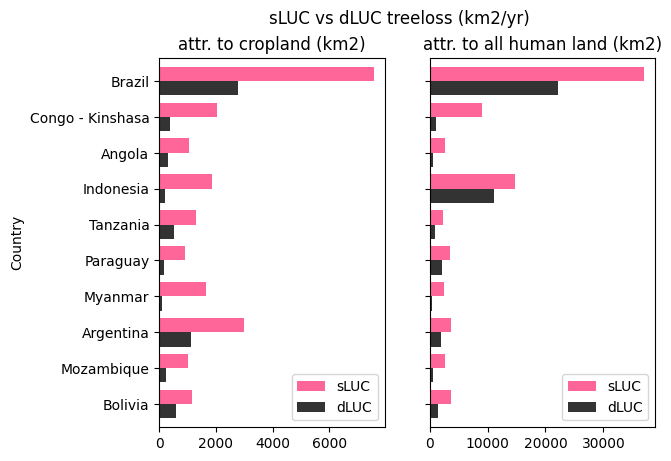

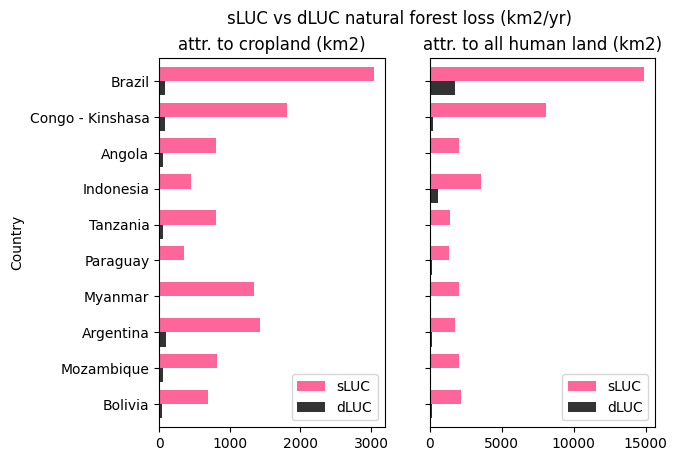

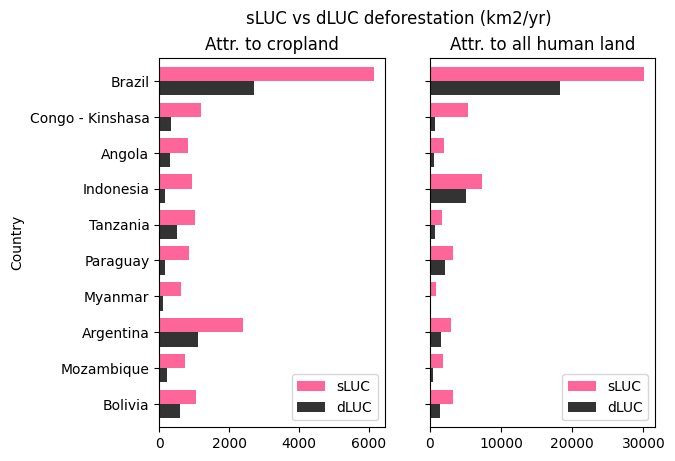

In [21]:
# dLUC
c = ["#fe6598", "#333333"]
N = 10

fig, axs = plt.subplots(1, 2, sharey=True)
fig.suptitle("sLUC vs dLUC treeloss (km2/yr)")
title = "attr. to all human land (km2)"
cols = {
    "country_name": "Country",
    "treeloss": "sLUC",
    "dluc_nonnat_treeloss": "dLUC",
}
all_stats_trop.sort_values(SORT_COL, ascending=False).head(N).filter(cols.keys()).rename(
    columns=cols
).plot.barh(x="Country", title=title, color=c, ax=axs[1], width=0.8).invert_yaxis()
title = "attr. to cropland (km2)"
cols = {
    "country_name": "Country",
    "sluc_treeloss_cropland": "sLUC",
    "dluc_cropland_treeloss": "dLUC",
}
all_stats_trop.sort_values(SORT_COL, ascending=False).head(N).filter(cols.keys()).rename(
    columns=cols
).plot.barh(x="Country", title=title, color=c, ax=axs[0], width=0.8).invert_yaxis()
fig.show()

fig, axs = plt.subplots(1, 2, sharey=True)
fig.suptitle("sLUC vs dLUC natural forest loss (km2/yr)")
title = "attr. to all human land (km2)"
cols = {
    "country_name": "Country",
    "nat_treeloss": "sLUC",
    "dluc_nonnat_nattreeloss": "dLUC",
}
all_stats_trop.sort_values(SORT_COL, ascending=False).head(N).filter(cols.keys()).rename(
    columns=cols
).plot.barh(x="Country", title=title, color=c, ax=axs[1], width=0.8).invert_yaxis()
title = "attr. to cropland (km2)"
cols = {
    "country_name": "Country",
    "sluc_nat_treeloss_cropland": "sLUC",
    "dluc_cropland_nattreeloss": "dLUC",
}
all_stats_trop.sort_values(SORT_COL, ascending=False).head(N).filter(cols.keys()).rename(
    columns=cols
).plot.barh(x="Country", title=title, color=c, ax=axs[0], width=0.8).invert_yaxis()
fig.show()

fig, axs = plt.subplots(1, 2, sharey=True)
fig.suptitle("sLUC vs dLUC deforestation (km2/yr)")
title = "Attr. to all human land"
cols = {
    "country_name": "Country",
    "deforest": "sLUC",
    "dluc_nonnat_deforest": "dLUC",
}
all_stats_trop.sort_values(SORT_COL, ascending=False).head(N).filter(cols.keys()).rename(
    columns=cols
).plot.barh(x="Country", title=title, color=c, ax=axs[1], width=0.8).invert_yaxis()
title = "Attr. to cropland"
cols = {
    "country_name": "Country",
    "sluc_deforest_cropland": "sLUC",
    "dluc_cropland_deforest": "dLUC",
}
all_stats_trop.sort_values(SORT_COL, ascending=False).head(N).filter(cols.keys()).rename(
    columns=cols
).plot.barh(x="Country", title=title, color=c, ax=axs[0], width=0.8).invert_yaxis()
fig.show()

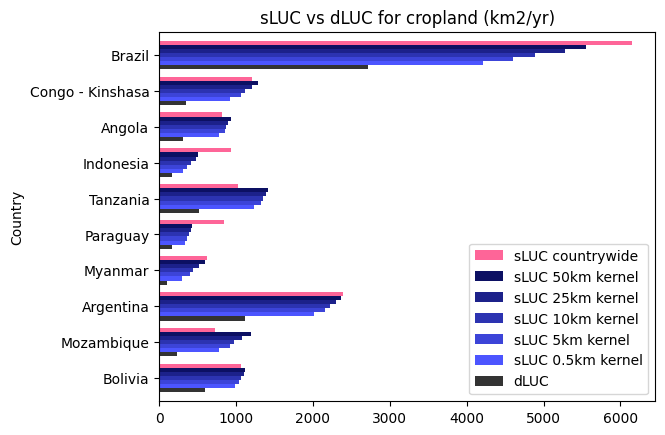

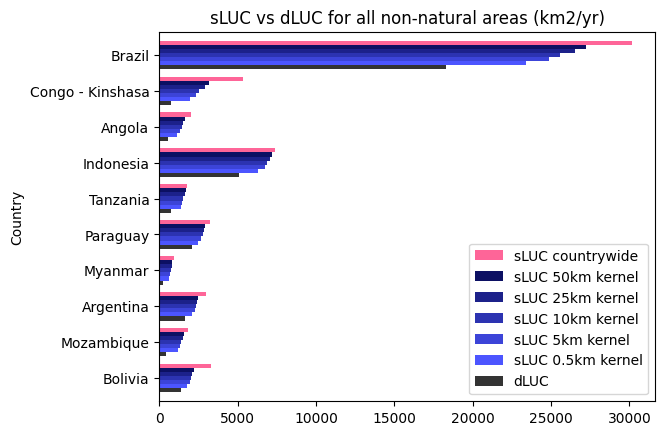

In [22]:
# spatial sLUC

c = ["#fe6598", "#0C1063", "#1C218A", "#2C33B1", "#3C44D8", "#4C55FF", "#333333"]

title = "sLUC vs dLUC for cropland (km2/yr)"
cols = {
    "country_name": "Country",
    "sluc_deforest_cropland": "sLUC countrywide",
    "cropland_deforest_by_human_lu_50km_1000m": "sLUC 50km kernel",
    "cropland_deforest_by_human_lu_25km_1000m": "sLUC 25km kernel",
    "cropland_deforest_by_human_lu_10km_1000m": "sLUC 10km kernel",
    "cropland_deforest_by_human_lu_5km_1000m": "sLUC 5km kernel",
    "cropland_deforest_by_human_lu_0km_1000m": "sLUC 0.5km kernel",
    "dluc_cropland_deforest": "dLUC",
}
all_stats_trop.sort_values(SORT_COL, ascending=False).head(N).filter(cols.keys()).rename(
    columns=cols
).plot.barh(x="Country", color=c, title=title, width=0.8).invert_yaxis()


title = "sLUC vs dLUC for all non-natural areas (km2/yr)"
cols = {
    "country_name": "Country",
    "deforest": "sLUC countrywide",
    "nonnat_deforest_by_human_lu_50km_1000m": "sLUC 50km kernel",
    "nonnat_deforest_by_human_lu_25km_1000m": "sLUC 25km kernel",
    "nonnat_deforest_by_human_lu_10km_1000m": "sLUC 10km kernel",
    "nonnat_deforest_by_human_lu_5km_1000m": "sLUC 5km kernel",
    "nonnat_deforest_by_human_lu_0km_1000m": "sLUC 0.5km kernel",
    "dluc_nonnat_deforest": "dLUC",
}
all_stats_trop.sort_values(SORT_COL, ascending=False).head(N).filter(cols.keys()).rename(
    columns=cols
).plot.barh(x="Country", color=c, title=title, width=0.8).invert_yaxis()

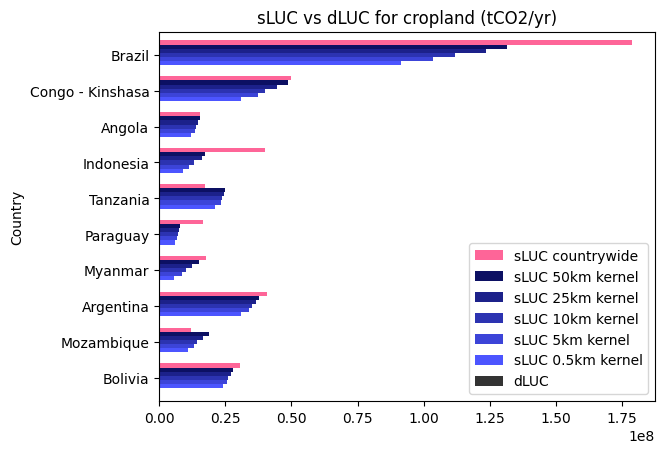

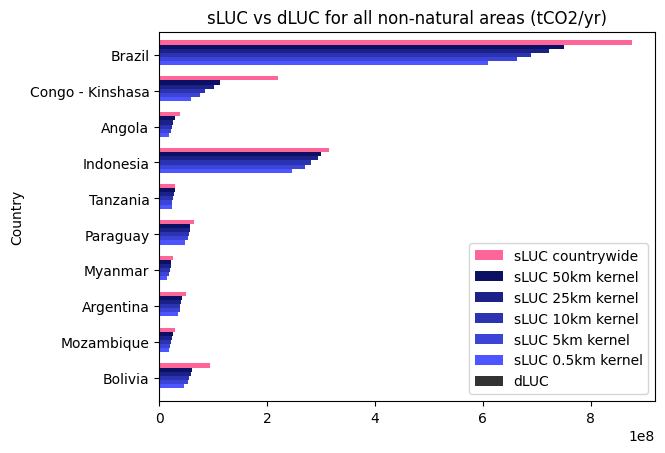

In [23]:
# spatial sLUC

c = ["#fe6598", "#0C1063", "#1C218A", "#2C33B1", "#3C44D8", "#4C55FF", "#333333"]

title = "sLUC vs dLUC for cropland (tCO2/yr)"
cols = {
    "country_name": "Country",
    "sluc_deforest_carbon_cropland": "sLUC countrywide",
    "cropland_deforest_carbon_by_human_lu_50km_1000m": "sLUC 50km kernel",
    "cropland_deforest_carbon_by_human_lu_25km_1000m": "sLUC 25km kernel",
    "cropland_deforest_carbon_by_human_lu_10km_1000m": "sLUC 10km kernel",
    "cropland_deforest_carbon_by_human_lu_5km_1000m": "sLUC 5km kernel",
    "cropland_deforest_carbon_by_human_lu_0km_1000m": "sLUC 0.5km kernel",
    "dluc_cropland_deforest_carbon": "dLUC",
}
all_stats_trop.sort_values(SORT_COL, ascending=False).head(N).filter(cols.keys()).rename(
    columns=cols
).plot.barh(x="Country", color=c, title=title, width=0.8).invert_yaxis()


title = "sLUC vs dLUC for all non-natural areas (tCO2/yr)"
cols = {
    "country_name": "Country",
    "deforest_carbon": "sLUC countrywide",
    "nonnat_deforest_carbon_by_human_lu_50km_1000m": "sLUC 50km kernel",
    "nonnat_deforest_carbon_by_human_lu_25km_1000m": "sLUC 25km kernel",
    "nonnat_deforest_carbon_by_human_lu_10km_1000m": "sLUC 10km kernel",
    "nonnat_deforest_carbon_by_human_lu_5km_1000m": "sLUC 5km kernel",
    "nonnat_deforest_carbon_by_human_lu_0km_1000m": "sLUC 0.5km kernel",
    "dluc_nonnat_deforest_carbon": "dLUC",
}
all_stats_trop.sort_values(SORT_COL, ascending=False).head(N).filter(cols.keys()).rename(
    columns=cols
).plot.barh(x="Country", color=c, title=title, width=0.8).invert_yaxis()

In [24]:
print("Cropland")
print("Tropical countries")
denom = "sluc_fao_cropland"
denom = "sluc_deforest_cropland"

all_stats_f = all_stats[all_stats[denom] > 0]
all_stats_trop_f = all_stats_trop[all_stats_trop[denom] > 0]

cols = {
    "country_name": "Country",
    "sluc_deforest_cropland": "sLUC countrywide",
    "cropland_deforest_by_human_lu_50km_1000m": "sLUC 50km kernel",
    "cropland_deforest_by_human_lu_25km_1000m": "sLUC 25km kernel",
    "cropland_deforest_by_human_lu_10km_1000m": "sLUC 10km kernel",
    "cropland_deforest_by_human_lu_5km_1000m": "sLUC 5km kernel",
    "cropland_deforest_by_human_lu_0km_1000m": "sLUC 0.5km kernel",
    "dluc_cropland_deforest": "dLUC",
}

for col, lyr in cols.items():
    if col != "country_name":
        print(lyr, round(all_stats_trop_f[col].sum() / all_stats_trop_f[denom].sum(), 3))
print("All countries")
for col, lyr in cols.items():
    if col != "country_name":
        print(lyr, round(all_stats_f[col].sum() / all_stats_f[denom].sum(), 3))

print("All HLU")
print("Tropical countries")
denom = "fao_forestloss"
denom = "deforest"

all_stats_f = all_stats[all_stats[denom] > 0]
all_stats_trop_f = all_stats_trop[all_stats_trop[denom] > 0]


cols = {
    "country_name": "Country",
    "deforest": "sLUC countrywide",
    "nonnat_deforest_by_human_lu_50km_1000m": "sLUC 50km kernel",
    "nonnat_deforest_by_human_lu_25km_1000m": "sLUC 25km kernel",
    "nonnat_deforest_by_human_lu_10km_1000m": "sLUC 10km kernel",
    "nonnat_deforest_by_human_lu_5km_1000m": "sLUC 5km kernel",
    "nonnat_deforest_by_human_lu_0km_1000m": "sLUC 0.5km kernel",
    "dluc_nonnat_deforest": "dLUC",
}

for col, lyr in cols.items():
    if col != "country_name":
        print(lyr, round(all_stats_trop_f[col].sum() / all_stats_trop_f[denom].sum(), 3))
print("All countries")
for col, lyr in cols.items():
    if col != "country_name":
        print(lyr, round(all_stats_f[col].sum() / all_stats_f[denom].sum(), 3))

Cropland
Tropical countries
sLUC countrywide 1.0
sLUC 50km kernel 1.069
sLUC 25km kernel 1.013
sLUC 10km kernel 0.947
sLUC 5km kernel 0.904
sLUC 0.5km kernel 0.793
dLUC 0.379
All countries
sLUC countrywide 1.0
sLUC 50km kernel 0.613
sLUC 25km kernel 0.547
sLUC 10km kernel 0.48
sLUC 5km kernel 0.441
sLUC 0.5km kernel 0.336
dLUC 0.117
All HLU
Tropical countries
sLUC countrywide 1.0
sLUC 50km kernel 0.872
sLUC 25km kernel 0.841
sLUC 10km kernel 0.801
sLUC 5km kernel 0.771
sLUC 0.5km kernel 0.72
dLUC 0.487
All countries
sLUC countrywide 1.0
sLUC 50km kernel 0.78
sLUC 25km kernel 0.74
sLUC 10km kernel 0.691
sLUC 5km kernel 0.65
sLUC 0.5km kernel 0.575
dLUC 0.278


In [25]:
# ALL
# all_stats_f = all_stats_f[~all_stats_f["country_name"].isin(('Canada', 'US'))]
print("ALL COUNTRIES", all_stats_f["fao_forestloss"].count())
print("DEFORESTATION")
print("r2", all_stats_f["fao_forestloss"].corr(all_stats_f["deforest"]) ** 2)
print(
    "r2 nonnat",
    all_stats_f["fao_forestloss"].corr(all_stats_f["nonnat_deforest_by_human_lu_50km_1000m"]) ** 2,
)
print(
    "r2 cropland",
    all_stats_f["sluc_fao_cropland"].corr(all_stats_f["cropland_deforest_by_human_lu_50km_1000m"])
    ** 2,
)
print("this/fao", all_stats_f["deforest"].sum() / all_stats_f["fao_forestloss"].sum())
print(
    "this/fao nonnat",
    all_stats_f["nonnat_deforest_by_human_lu_50km_1000m"].sum()
    / all_stats_f["fao_forestloss"].sum(),
)
print(
    "this/fao cropland",
    all_stats_f["cropland_deforest_by_human_lu_50km_1000m"].sum()
    / all_stats_f["sluc_fao_cropland"].sum(),
)
print("DEFORESTATION TOTALS km2/yr")
print("this", all_stats_f["deforest"].sum())
print("fao", all_stats_f["fao_forestloss"].sum())
print("this cropland", all_stats_f["cropland_deforest_by_human_lu_50km_1000m"].sum())
print("fao cropland", all_stats_f["sluc_fao_cropland"].sum())

print("\n\nCO2")
print("r2", all_stats_f["fao_emissions"].corr(all_stats_f["deforest_carbon"]) ** 2)
print(
    "r2 nonnat",
    all_stats_f["fao_emissions"].corr(all_stats_f["nonnat_deforest_carbon_by_human_lu_50km_1000m"])
    ** 2,
)
print(
    "r2 cropland",
    all_stats_f["sluc_emissions_fao_cropland"].corr(
        all_stats_f["cropland_deforest_carbon_by_human_lu_50km_1000m"]
    )
    ** 2,
)
print("this/fao", all_stats_f["deforest_carbon"].sum() / all_stats_f["fao_emissions"].sum())
print(
    "this/fao nonnat",
    all_stats_f["nonnat_deforest_carbon_by_human_lu_50km_1000m"].sum()
    / all_stats_f["fao_emissions"].sum(),
)
print(
    "this/fao cropland",
    all_stats_f["cropland_deforest_carbon_by_human_lu_50km_1000m"].sum()
    / all_stats_f["sluc_emissions_fao_cropland"].sum(),
)

print("CO2 TOTALS tCO2/yr")
print("this", all_stats_f["deforest_carbon"].sum())
print("fao", all_stats_f["fao_emissions"].sum())
print("this cropland", all_stats_f["cropland_deforest_carbon_by_human_lu_50km_1000m"].sum())
print("fao cropland", all_stats_f["sluc_emissions_fao_cropland"].sum())

ALL COUNTRIES 189
DEFORESTATION
r2 0.25666936915004657
r2 nonnat 0.34735480116959555
r2 cropland 0.15772966812559422
this/fao 1.7888201519467823
this/fao nonnat 1.394629771750286
this/fao cropland 2.784704237825245
DEFORESTATION TOTALS km2/yr
this 196238.77792402438
fao 109702.91100000002
this cropland 60841.95554500358
fao cropland 21848.6238928264


CO2
r2 0.27678954502831987
r2 nonnat 0.3485410341869372
r2 cropland 0.10379120395993856
this/fao 1.5291116123878166
this/fao nonnat 1.1625091050319198
this/fao cropland 2.0531519503612436
CO2 TOTALS tCO2/yr
this 5130590013.81232
fao 3355275031.7555556
this cropland 1372143505.1379404
fao cropland 668310742.853941


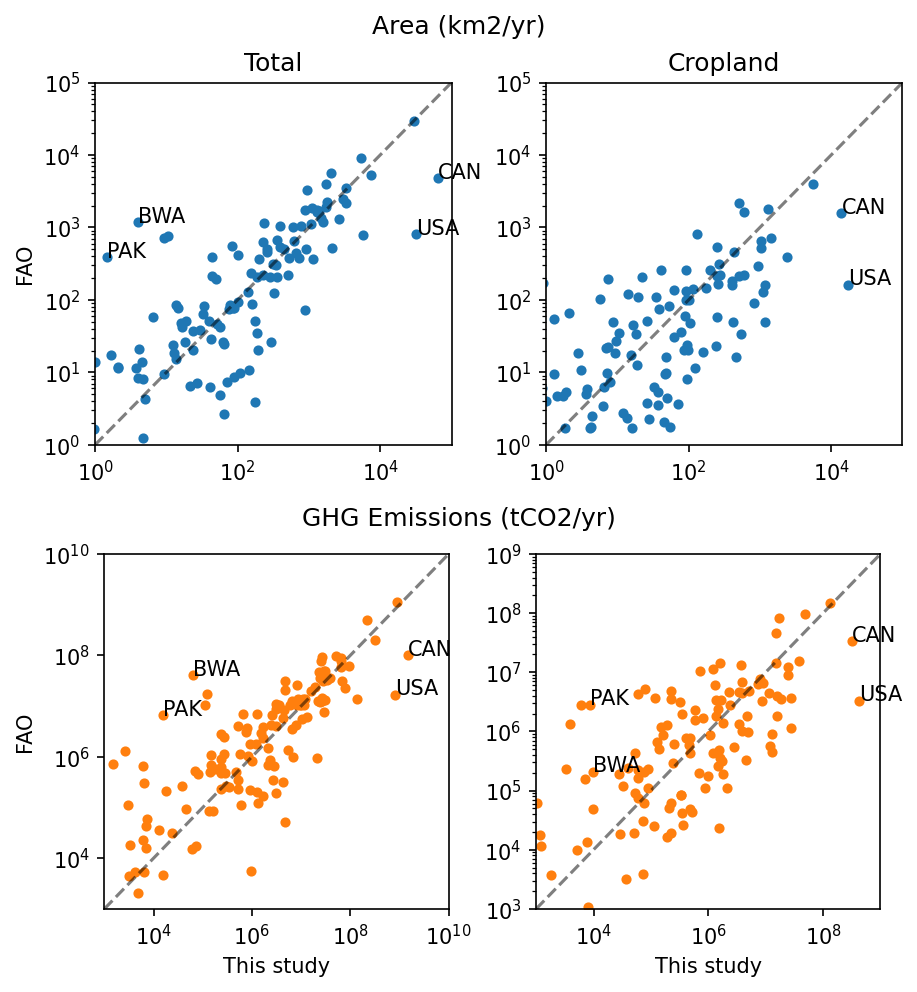

In [26]:
lbl_countries = ["Canada", "US", "Botswana", "Pakistan"]

all_vars = [
    {
        "deforest": "This study",
        "fao_forestloss": "FAO",
    },
    {
        "cropland_deforest_by_human_lu_50km_1000m": "This study",
        "sluc_fao_cropland": "FAO",
    },
    {
        "deforest_carbon": "This study",
        "fao_emissions": "FAO",
    },
    {
        "cropland_deforest_carbon_by_human_lu_50km_1000m": "This study",
        "sluc_emissions_fao_cropland": "FAO",
    },
]

lims = [[1, 1e5], [1, 1e5], [1e3, 1e10], [1e3, 1e9]]

fig = plt.figure(figsize=(6, 6.5), dpi=150, layout="constrained")
subfigs = fig.subfigures(2, 1)
_axs0 = subfigs[0].subplots(1, 2)
subfigs[0].suptitle("Area (km2/yr)")
_axs1 = subfigs[1].subplots(1, 2)
subfigs[1].suptitle("GHG Emissions (tCO2/yr)")
axs = np.concatenate([_axs0, _axs1])
for i in range(4):
    ax = axs[i]
    vars = all_vars[i]
    lim = lims[i]
    ax.plot(lim, lim, color="k", linestyle="--", alpha=0.5)

    x = list(vars.keys())[0]
    y = list(vars.keys())[1]
    color = "tab:blue"
    if i > 1:
        color = "tab:orange"

    # all_stats_f.filter(vars.keys()).rename(columns=vars).
    ax.scatter(x=all_stats_f[x], y=all_stats_f[y], color=color, s=15)
    ax.set_xlim(lim)
    ax.set_ylim(lim)
    ax.set_yscale("log")
    ax.set_xscale("log")
    if i == 0:
        ax.set_title("Total")
        ax.set_ylabel("FAO")
    elif i == 1:
        ax.set_title("Cropland")
    elif i == 2:
        ax.set_ylabel("FAO")
        ax.set_xlabel("This study")
    elif i == 3:
        ax.set_xlabel("This study")

    for c in lbl_countries:
        i = all_stats_f[all_stats_f["country_name"] == c].index[0]
        txt = all_stats_f["ISO3166-1-Alpha-3"][i]
        _x = all_stats_f[x][i]
        _y = all_stats_f[y][i]
        ax.annotate(txt, (_x, _y), fontsize=10)

plt.show()

In [27]:
# TROPICAL
print("TROPICAL COUNTRIES", all_stats_trop_f["fao_forestloss"].count())
print("DEFORESTATION")
print("r2", all_stats_trop_f["fao_forestloss"].corr(all_stats_trop_f["deforest"]) ** 2)
print(
    "r2 nonnat",
    all_stats_trop_f["fao_forestloss"].corr(
        all_stats_trop_f["nonnat_deforest_by_human_lu_50km_1000m"]
    )
    ** 2,
)
print(
    "r2 cropland",
    all_stats_trop_f["sluc_fao_cropland"].corr(
        all_stats_trop_f["cropland_deforest_by_human_lu_50km_1000m"]
    )
    ** 2,
)
print("this/fao", all_stats_trop_f["deforest"].sum() / all_stats_trop_f["fao_forestloss"].sum())
print(
    "this/fao nonnat",
    all_stats_trop_f["nonnat_deforest_by_human_lu_50km_1000m"].sum()
    / all_stats_trop_f["fao_forestloss"].sum(),
)
print(
    "this/fao cropland",
    all_stats_trop_f["cropland_deforest_by_human_lu_50km_1000m"].sum()
    / all_stats_trop_f["sluc_fao_cropland"].sum(),
)
print("DEFORESTATION TOTALS km2/yr")
print("this", all_stats_trop_f["deforest"].sum())
print("fao", all_stats_trop_f["fao_forestloss"].sum())
print("this cropland", all_stats_trop_f["cropland_deforest_by_human_lu_50km_1000m"].sum())
print("fao cropland", all_stats_trop_f["sluc_fao_cropland"].sum())

print("\n\nCO2")
print("r2", all_stats_trop_f["fao_emissions"].corr(all_stats_trop_f["deforest_carbon"]) ** 2)
print(
    "r2 nonnat",
    all_stats_trop_f["fao_emissions"].corr(
        all_stats_trop_f["nonnat_deforest_carbon_by_human_lu_50km_1000m"]
    )
    ** 2,
)
print(
    "r2 cropland",
    all_stats_trop_f["sluc_emissions_fao_cropland"].corr(
        all_stats_trop_f["cropland_deforest_carbon_by_human_lu_50km_1000m"]
    )
    ** 2,
)
print(
    "this/fao", all_stats_trop_f["deforest_carbon"].sum() / all_stats_trop_f["fao_emissions"].sum()
)
print(
    "this/fao nonnat",
    all_stats_trop_f["nonnat_deforest_carbon_by_human_lu_50km_1000m"].sum()
    / all_stats_trop_f["fao_emissions"].sum(),
)
print(
    "this/fao cropland",
    all_stats_trop_f["cropland_deforest_carbon_by_human_lu_50km_1000m"].sum()
    / all_stats_trop_f["sluc_emissions_fao_cropland"].sum(),
)

print("CO2 TOTALS tCO2/yr")
print("this", all_stats_trop_f["deforest_carbon"].sum())
print("fao", all_stats_trop_f["fao_emissions"].sum())
print("this cropland", all_stats_trop_f["cropland_deforest_carbon_by_human_lu_50km_1000m"].sum())
print("fao cropland", all_stats_trop_f["sluc_emissions_fao_cropland"].sum())

TROPICAL COUNTRIES 118
DEFORESTATION
r2 0.9489092097041766
r2 nonnat 0.9292023440660951
r2 cropland 0.6559128251176756
this/fao 0.871124119050413
this/fao nonnat 0.7596836319520355
this/fao cropland 1.3676544218993911
DEFORESTATION TOTALS km2/yr
this 85650.52431758428
fao 98321.83777777778
this cropland 24969.326645787358
fao cropland 18257.043772146833


CO2
r2 0.9271180976026955
r2 nonnat 0.8742008969289063
r2 cropland 0.7298525604255243
this/fao 0.7886570904513669
this/fao nonnat 0.6451488103502799
this/fao cropland 0.8725935138306302
CO2 TOTALS tCO2/yr
this 2468422124.9320436
fao 3129905449.1722226
this cropland 523896829.09233797
fao cropland 600390469.088481
